In [104]:
!pip install -U pillow

  Using cached pillow-10.2.0-cp310-cp310-manylinux_2_28_x86_64.whl (4.5 MB)
  Attempting uninstall: pillow
    Found existing installation: Pillow 10.0.1
    Uninstalling Pillow-10.0.1:
      Successfully uninstalled Pillow-10.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.2.0 which is incompatible.


In [105]:
!pip install easygui

In [106]:
!pip install rembg

  Using cached Pillow-10.0.1-cp310-cp310-manylinux_2_28_x86_64.whl (3.6 MB)
  Attempting uninstall: pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0


In [107]:
from rembg import remove

In [108]:
import requests

In [109]:
from PIL import Image


In [110]:
from io import BytesIO
import os

In [111]:
os.makedirs("original" , exist_ok =  True)
os.makedirs("masked" , exist_ok =  True)

In [140]:
img_url = "https://raw.githubusercontent.com/emanemair/images/main/6.jpg"
img_name = img_url.split('/')[-1]
img_name

'6.jpg'

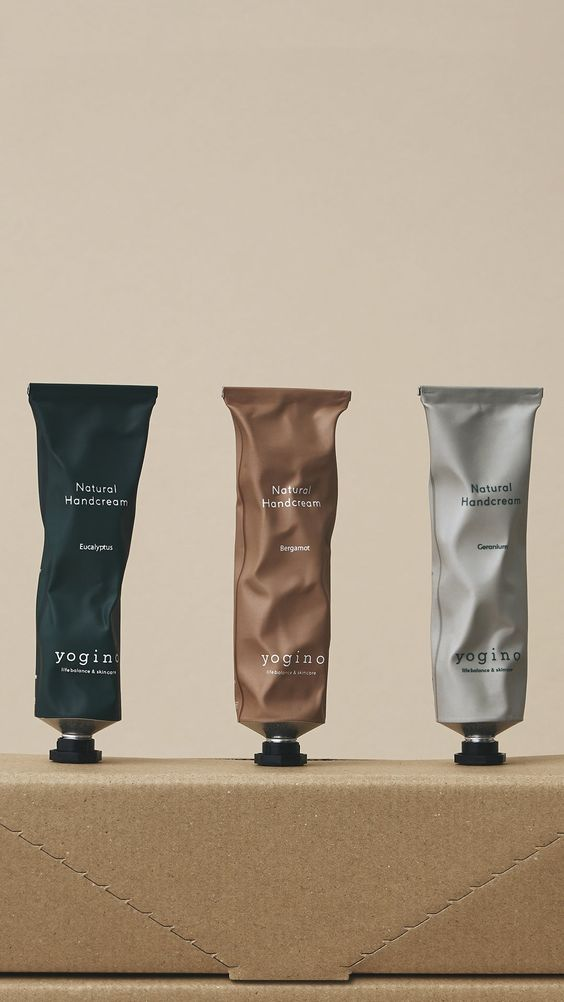

In [141]:
img = Image.open(BytesIO(requests.get(img_url).content))
img

In [142]:
img.save('original/'+img_name , format= 'jpeg')

In [143]:
output_path = 'masked/'+img_name
output_path

'masked/6.jpg'

In [144]:
with open(output_path ,'wb')as f :
  input= open('original/'+img_name , 'rb').read()
  subject = remove(input ,alpha_matting_foreground_threshold=50)
  f.write(subject)

In [145]:
background_img ='https://raw.githubusercontent.com/emanemair/remove-background-/main/background.jpg'
background_img = Image.open(BytesIO(requests.get(background_img).content))

In [146]:
background_img = background_img.resize((img.width , img.height))

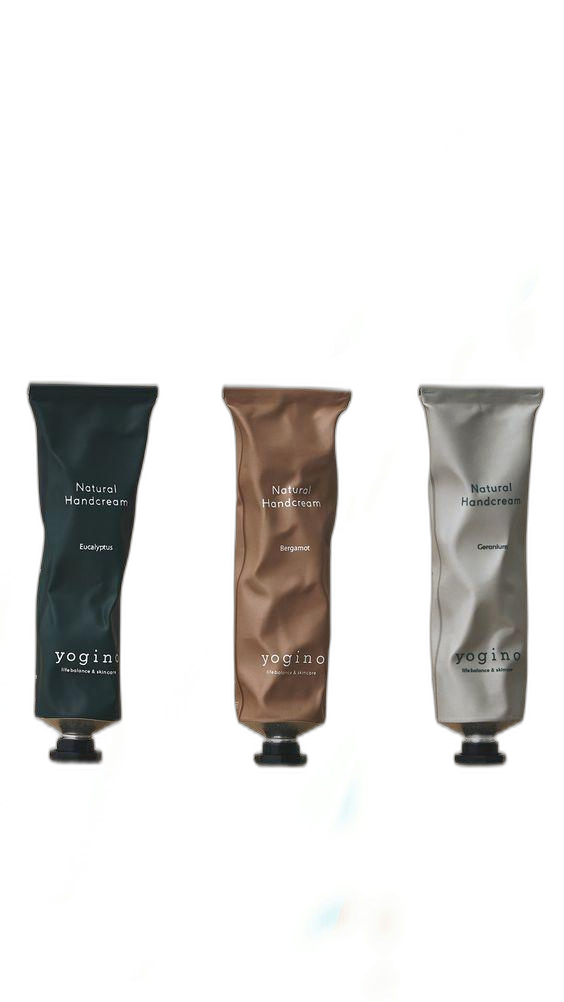

In [147]:
forground_img = Image.open(output_path)
background_img.paste(forground_img ,(0,0) , forground_img)
background_img.save('masked/background.jpg' , format = 'jpeg')
background_img